# Logistic Regression

In [1]:
!pip install openpyxl

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,  roc_curve, roc_auc_score, precision_recall_curve, auc

# from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode



from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
from scipy.spatial import distance

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Inicialmente se toman los datos y se construye el respectivo dataframe de pandas. Luego, se agrega una nueva columna llamada "marca_exito" al DataFrame que se basa en la columna "Porcentaje de clics de las impresiones (%)" .Si el valor en esta columna es mayor que 3, se asigna un valor de 1 a la nueva columna "marca_exito", de lo contrario, se asigna un valor de 0.

In [2]:
df = pd.read_excel('/work/Data Modelos.xlsx')
df

,id,Suscriptores ganados,Tiempo de visualizaci√≥n (horas),Me gusta,Clics en teaser de tarjeta,Tarjetas mostradas,Clics en elementos de pantalla final,suscriptores,Densidad_Publicitaria,Porcentaje de clics de las impresiones (%),Duracion Minutos,Comentarios a√±adidos,Porcentaje medio visto (%),rating,dia_semana,consecutivo_tema,No me gusta,RPM (USD),marca_exito
0,7nF_xuJXP2Y,0,0.0015,0,0,0,0,1,0.000,0.00,7.533333,0,1.31,4.901235,3,14,0,0.000,0
1,e4G-6BlBGdY,0,0.3858,0,0,0,0,5,0.312,8.13,12.800000,0,12.97,4.614458,1,5,1,0.769,1
2,gDyOAURjjrc,0,22895.0000,1,0,0,1,35,0.228,3.14,35.066667,0,23.07,4.809524,1,4,0,3765.000,1
3,uh-dv1gvpTI,0,0.1308,0,0,0,0,15,0.234,1.45,12.833333,0,21.96,4.873303,1,16,0,0.000,0
4,0ZNtr90_roU,0,0.1090,0,0,0,0,2,0.000,2.33,6.633333,0,28.11,4.777778,3,14,0,2667.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,KqBGDNGJ8-c,0,0.5448,0,0,0,0,11,0.183,2.76,10.900000,0,46.93,4.900000,3,10,0,1429.000,0
96,pB9xmmTnMTc,0,11181.0000,2,0,0,0,13,0.300,6.79,10.000000,0,41.93,4.909091,3,13,0,1.000,1
97,DWmNpU8Amco,0,40887.0000,0,0,3,0,32,0.228,4.97,17.566667,0,52.20,5.000000,3,10,0,1741.000,1
98,C9jBrGCi2LE,0,0.5051,0,0,0,0,5,0.238,1.55,21.033333,0,36.93,4.894737,3,10,0,0.000,0


Se observa que las etiquetas están balanceadas al obtener una participación del 55% con la etiqueta cero [0] y un 45% con la etiqueta uno [1]

0    0.55
1    0.45
Name: marca_exito, dtype: float64


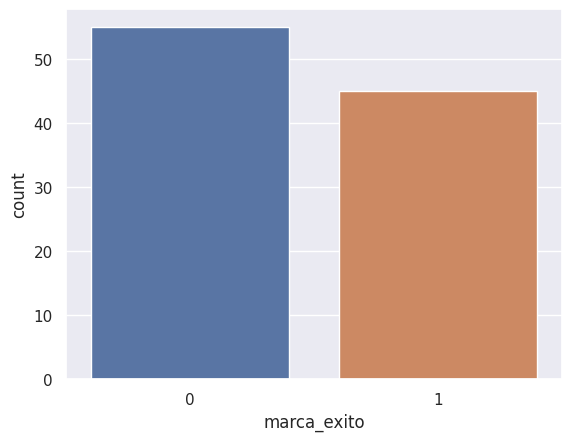

In [3]:
print( df.marca_exito.value_counts() / df.marca_exito.value_counts().sum() )
sns.countplot(x= 'marca_exito', data = df);

Se dividen los datos de forma tal que el 70% de estos es utilizado para el entrenamiento del modelo y el 30% restante se utiliza en el posterior test del mismo.

In [4]:
# diviendo los datos de testeo y entrenamiento:

X = df.drop(['marca_exito', 'Porcentaje de clics de las impresiones (%)', 'RPM (USD)', 'id'], axis= 1)

names = X.columns

scaler = StandardScaler()
X = np.array(X)
X = StandardScaler().fit_transform(X)

y = df.marca_exito
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)


(70, 15)
(30, 15)


# Regresión Logísitica

Testing accuracy train = 0.8142857142857143
Testing accuracy  test= 0.7666666666666667
[0.64285714 0.64285714 0.64285714 0.78571429 0.64285714]
Mediana 0.6429
Media 0.6714
Min 0.6429
Max 0.7857
-------------------------------------------------------------------------------------------------------------
Best estimador: {'solver': 'saga', 'penalty': 'l1', 'C': 1.3483483483483483}
Testing accuracy train = 0.8142857142857143
Testing accuracy  test= 0.8333333333333334


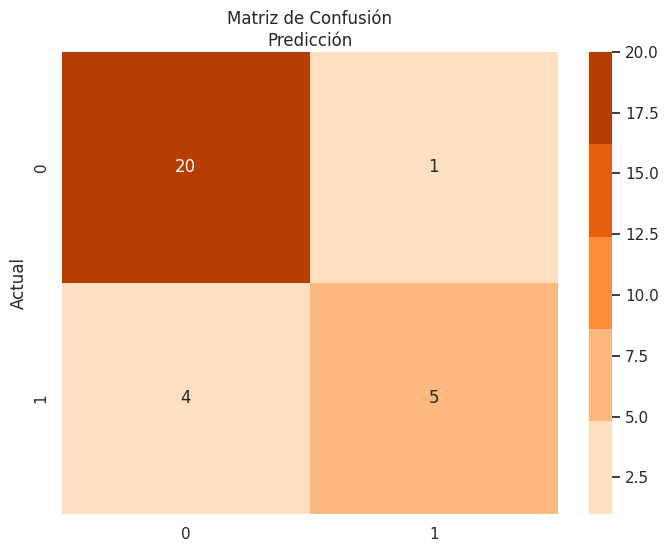

-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.83      0.56      0.67         9

    accuracy                           0.83        30
   macro avg       0.83      0.75      0.78        30
weighted avg       0.83      0.83      0.82        30



In [5]:
random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
            'C': np.linspace(0,3,1000),
            "solver": ["liblinear", "sag", "saga"]}

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

Logist = LogisticRegression() 
Logist.fit(X_train, y_train)

y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

scores = cross_val_score(Logist, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)

print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')

print("-------------------------------------------------------------------------------------------------------------")


Logist = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = random_grid,random_state=42, cv=cv)
Logist.fit(X_train, y_train)
print('Best estimador:', Logist.best_params_)

y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)

print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Oranges", n_colors=5)

sns.heatmap(cnf_matrix, annot=True, cmap=colors, fmt='g')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicción')
ax.set_ylabel('Actual')
ax.set_title('Matriz de Confusión')

plt.show()

print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [6]:
# Obtener los coeficientes y la importancia de las variables
coefficients = np.abs(Logist.best_estimator_.coef_[0])
importance = coefficients / np.sum(coefficients)

impvariables = pd.DataFrame()

impvariables['Variable'] = names

impvariables['Importancia'] = importance
impvariables

,Variable,Importancia
0,Suscriptores ganados,0.175922
1,Tiempo de visualizaci√≥n (horas),0.362462
2,Me gusta,0.000000
3,Clics en teaser de tarjeta,0.000000
4,Tarjetas mostradas,0.027351
5,Clics en elementos de pantalla final,0.116067
6,suscriptores,0.143220
7,Densidad_Publicitaria,0.038847
8,Duracion Minutos,0.023011
9,Comentarios a√±adidos,0.028685


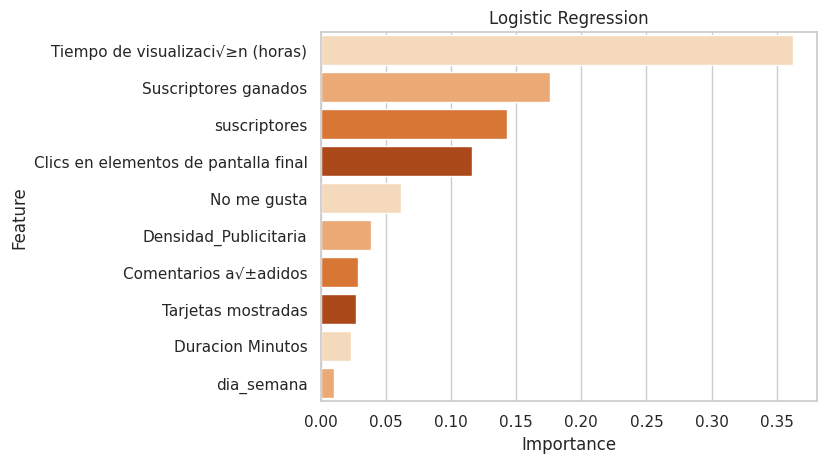

In [7]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = impvariables[impvariables.Importancia > 0.01]
impvariables.sort_values('Importancia', ascending = False, inplace = True)

colors = sns.color_palette("Oranges", n_colors=4)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Logistic Regression');

Este código generará un gráfico que muestra la curva ROC (Receiver Operating Characteristic) de la regresión logística. La línea diagonal representa el rendimiento de un modelo aleatorio, y la curva ROC de la regresión logística se traza en rojo, con el valor de AUC mostrado en la leyenda. Cuanto más cerca esté la curva ROC del punto (0,1) en la esquina superior izquierda, mejor será el rendimiento del modelo.

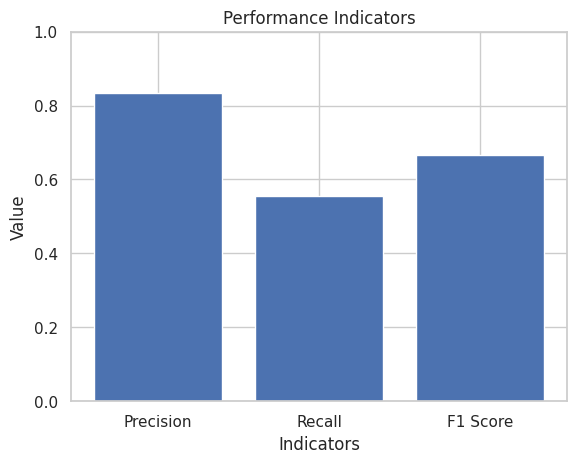

In [8]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

# Obtener las predicciones en el conjunto de prueba
y_pred = Logist.predict(X_test)

# Calcular las métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Crear el gráfico
indicators = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.bar(indicators, values)
plt.xlabel('Indicators')
plt.ylabel('Value')
plt.title('Performance Indicators')
plt.ylim([0, 1])
plt.show()


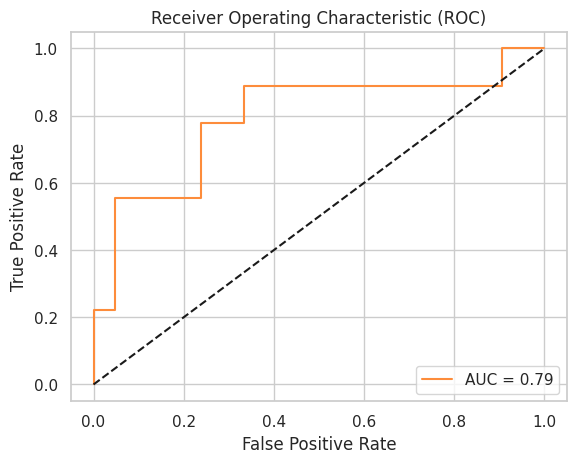

In [9]:
# Obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba = Logist.predict_proba(X_test)[:, 1]

# Calcular el valor de AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Crear el gráfico de la curva ROC con colores personalizados
colors = sns.color_palette("Oranges", n_colors=1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color=colors[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Análisis regresión logística

## Evaluación de métricas del modelo

La precisión, definida como la proporción de verdaderos positivos entre todos los valores clasificados como positivos. En este caso, la precisión del modelo para la ‘marca éxito’ 0 es del 83% y para la ‘marca éxito’ 1 es del 83% 

El Recall, que es la proporción de verdaderos positivos entre todos los valores verdaderos de la clase indica para la ‘marca éxito’ 0 un valor del 95%, lo que significa que de todos los valores verdaderos de la ‘marca éxito’ 0 en el conjunto de datos, el modelo ha identificado el 95% de ellos. Analogamente, para la ‘marca éxito’ 1 el recall es de 56% 

El F1-score combina la precisión y el recall del modelo en una sola métrica. El valor F1-score para la ‘marca éxito’ 0 es del 89% y para la ‘marca éxito’ 1 es del 67%. Cuanto más alto sea el valor de F1-score, mejor será el rendimiento general del modelo. 

Support es el número de instancias en el conjunto de datos que pertenecen a cada clase. En este caso, hay 21 instancias de la ‘marca éxito’ 0 y 9 instancias de la ‘marca éxito’ 1. 

Estos resultados indican que el modelo tiene un buen rendimiento en términos de precisión para ambas clases, mientras que su rendimiento en términos de recall es mejor para la ‘marca éxito’ 0. El valor de F1-score indica un rendimiento mejor para los videos no exitosos. 


## Matriz de confusión

En el caso de la matriz de confusión para la predicción se tiene que la ‘marca éxito’ 0 clasifica adecuadamente 20 (66.6%) negativos mientras que para la clase de videos exitosos clasifica correctamente 5 videos (16.6%), globalmente se tiene un accuracy del 83%, es una métrica con un buen desempeño de clasificación.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af42914d-1d55-41f0-8851-adb5c602e38b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>